<a href="https://colab.research.google.com/github/sbooeshaghi/colosseum/blob/master/analysis/constant_flowrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sbooeshaghi/colosseum.git

Cloning into 'colosseum'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (212/212), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 424 (delta 111), reused 111 (delta 38), pack-reused 212
Receiving objects: 100% (424/424), 10.34 MiB | 17.34 MiB/s, done.
Resolving deltas: 100% (212/212), done.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.patches as mpatches
import math
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mtick


plt.rcParams.update({'font.size': 20})
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv("/content/colosseum/data/experiment_2.txt", sep="\t")

In [4]:
df.head()

,Collection Time (s),Experiment,Total weight [mg],Fluid weight [mg]
0,2,1,1348.2,110.22
1,4,1,1477.7,239.72
2,6,1,1561.2,323.22
3,8,1,1619.7,381.72
4,10,1,1785.7,547.72


In [5]:
experiments = np.unique(df["Experiment"].values)
tpts = np.arange(2, 32, 2)
means = df.groupby(["Collection Time (s)"])["Fluid weight [mg]"].mean()

In [6]:
slope, intercept, r_value, p_value, std_err = stats.linregress(tpts, means)

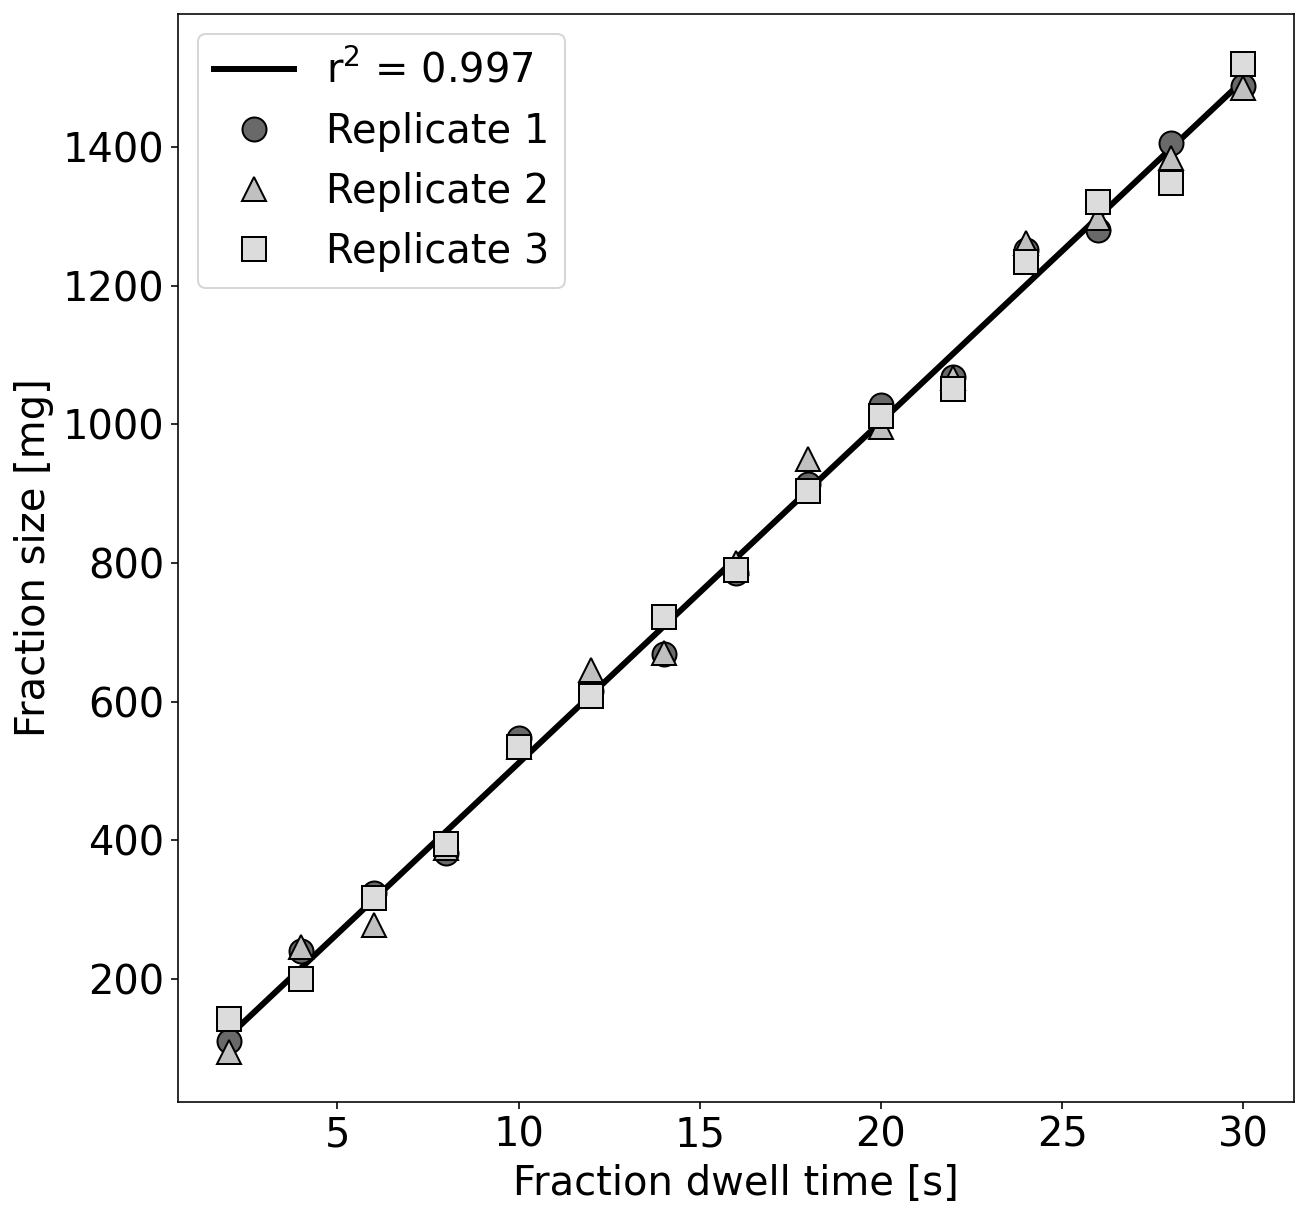

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(tpts, intercept + slope*tpts, 'black', label='r$^2$ = {:.3f}'.format(r_value**2), linewidth=3)


shapes = ["o", "^", "s"]
colors = ["dimgrey", "silver", "gainsboro"]

for idx, exp in enumerate(experiments):
    tmp = df[df["Experiment"] == exp]
    cumsum = tmp["Fluid weight [mg]"].values.cumsum()
    
    ax.plot(tmp["Collection Time (s)"].values, tmp["Fluid weight [mg]"].values, label="Replicate {}".format(idx+1),linestyle='None', marker=shapes[idx], color=colors[idx], markeredgecolor='black', markersize=12)
    
ax.set_xlabel("Fraction dwell time [s]")
ax.set_ylabel("Fraction size [mg]")


plt.legend()

# plt.savefig("../figures/fraction_dwelltime.pdf", bbox_inches='tight')
# plt.savefig("../figures/fraction_dwelltime.png", bbox_inches='tight', dpi=100)


plt.show()